# Tick Strategy
_Version 0.1_

In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import tick as tk
from getstock import *
from simtools import *

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [2]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!
tickfile = 'APPL-TAQ-Sep03.zip'
#test_day = '09/03/19'
taq = pd.read_pickle(tickfile)

In [3]:
taq.iloc[200000:300000,:]

# filter on date
#day = taq[test_day]

,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2019-09-03 09:51:06.172355425,K,206.56,1.0,206.68,2.0,R,2612405.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.172592265,C,206.57,1.0,217.14,1.0,R,2612408.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175154421,Q,206.56,2.0,206.60,3.0,R,2612434.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175242516,N,206.57,4.0,206.61,4.0,R,2612435.0,2.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 09:51:06.175310952,N,206.57,1.0,206.61,4.0,R,2612436.0,2.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 10:03:41.046196783,N,205.68,1.0,205.73,4.0,R,4037948.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046295422,N,205.67,4.0,205.73,4.0,R,4037949.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046340089,C,205.69,1.0,217.14,1.0,R,4037950.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 10:03:41.046347489,P,205.67,1.0,205.73,1.0,R,4037951.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN


## Run the Simulator

In [53]:
# without the tick signal...
results = tk.algo_loop( taq.iloc[100000:200000,:] )

2019-10-28 21:43:58:290940: Beginning Tick Strategy run
Average stock spread for sample: 2.1311
2019-10-28 21:43:58:375213: starting main loop
2019-10-28 21:46:07:617094: end simulation loop
2019-10-28 21:46:07:617289: order analytics
2019-10-28 21:46:07:646693: Algo run complete.


In [54]:
results

,tick,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:38:16.241693606,1,207.431,206.38,206.38,206.38,1,0,0,1,Agg,b
2019-09-03 09:38:16.241741991,1,207.431,206.38,206.38,206.38,2,0,0,1,Agg,b
2019-09-03 09:38:16.858500175,1,207.451,206.38,206.4,206.387,3,-0.02,0,1,Agg,b
2019-09-03 09:38:17.244698778,1,207.091,206.38,206.39,206.387,4,-0.03,0,1,Agg,b
2019-09-03 09:38:17.293145154,-1,206.287,206.35,206.36,206.387,3,-0.1125,-0.0275,1,Agg,s
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 09:51:05.616363090,-1,205.707,206.561,206.54,206.297,-943,-249.03,152.282,1,Agg,s
2019-09-03 09:51:05.617019579,-1,205.687,206.561,206.54,206.297,-944,-249.228,152.282,1,Agg,s
2019-09-03 09:51:05.977449655,-1,205.688,206.56,206.56,206.297,-945,-248.476,152.282,1,Agg,s
2019-09-03 09:51:05.977470351,-1,205.671,206.56,206.56,206.297,-946,-248.667,152.282,1,Agg,s


In [55]:
results[results['trade_type'] == 'Pas']

,tick,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side


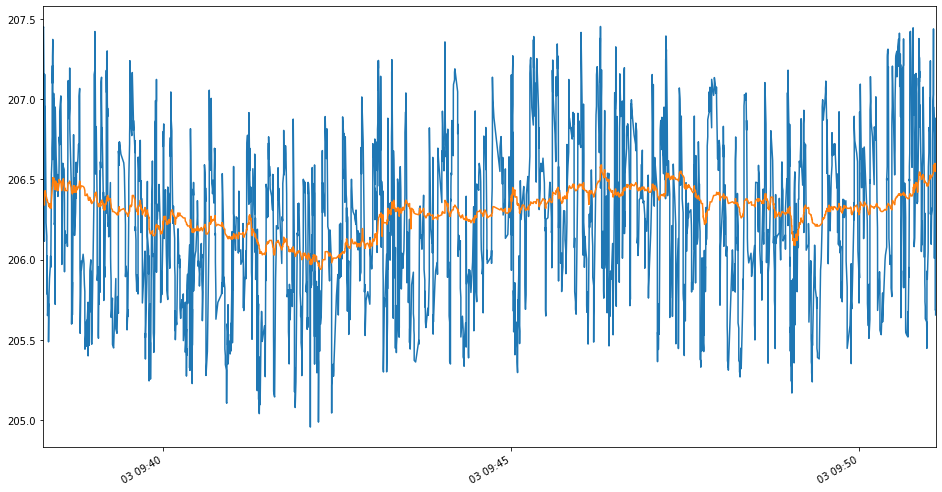

In [56]:
results['fair_value'].plot()
results['market_price'].plot()
plt.show()